## Lineal Regression

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
d = {'x': [1, 2, 3, 4, 5], 'y': [1, 2, 3, 3, 5]}
dataset = pd.DataFrame(data=d)
dataset

,x,y
0,1,1
1,2,2
2,3,3
3,4,3
4,5,5


https://koldopina.com/regresion-lineal-simple/


## Creamos los datos de entrenamiento y testeo.

En primer lugar, creamos una variable X con los datos de la temperatura exterior, y una variable y con los datos de la potencia eléctrica.

In [3]:
X = dataset['x'].values.reshape(-1,1)
y = dataset['y'].values.reshape(-1,1)

In [4]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [5]:
y

array([[1],
       [2],
       [3],
       [3],
       [5]])

In [6]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=10)

In [7]:
X_train

array([[1],
       [5],
       [2]])

In [8]:
X_test

array([[3],
       [4]])

In [9]:
y_train

array([[1],
       [5],
       [2]])

In [10]:
y_test

array([[3],
       [3]])

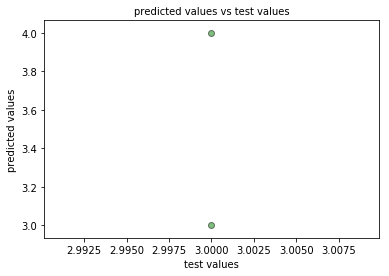

In [16]:
plt.scatter(y_test, predictions, c='g', edgecolors=(0, 0, 0), alpha=0.5)
plt.title('predicted values vs test values', fontsize=10)
plt.xlabel('test values')
plt.ylabel('predicted values')
plt.show()

## Creamos el modelo y lo entrenamos.
Usaremos el modelo LinearRegression del módulo linear_model de sklearn.

Creamos una instancia del modelo:

In [20]:
lr = LinearRegression()

In [21]:
# Train the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
# make the prediction
predictions = lr.predict(X_test)
predictions

array([[3.],
       [4.]])

In [23]:
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [[1.]]
Mean squared error: 0.50
Variance score: 0.00


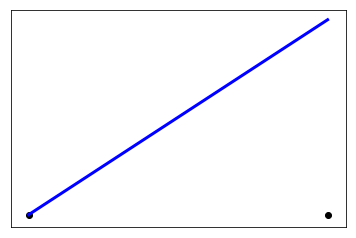

In [25]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Finalize Your Model with pickle
Pickle is the standard way of serializing objects in Python. You can use the pickle1 operation
to serialize your machine learning algorithms and save the serialized format to a le. Later you
can load this le to deserialize your model and use it to make new predictions. The example
below demonstrates how you can train a logistic regression model on the Pima Indians onset of
diabetes dataset, save the model to le and load it to make predictions on the unseen test set.

machine_learning_mastering_with_python

In [46]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

In [47]:
# save the model to disk
filename = 'finalized_model3.sav'
dump(lr, open(filename, 'wb'))
# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.0


In [44]:
# Save Model Using joblib
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.externals.joblib import dump



# save the model to disk
filename4 = 'finalized_model4.sav'
dump(lr, filename)
# some time later...
# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

TypeError: file must have 'read' and 'readline' attributes

## Tips for Finalizing Your Model
This section lists some important considerations when nalizing your machine learning models.
 Python Version. Take note of the Python version. You almost certainly require the
same major (and maybe minor) version of Python used to serialize the model when you
later load it and deserialize it.
 Library Versions. The version of all major libraries used in your machine learning
project almost certainly need to be the same when deserializing a saved model. This is
not limited to the version of NumPy and the version of scikit-learn.
 Manual Serialization. You might like to manually output the parameters of your
learned model so that you can use them directly in scikit-learn or another platform in
the future. Often the techniques used internally by machine learning algorithms to make
predictions are a lot simpler than those used to learn the parameters and can be easy to
implement in custom code that you have control over.
Take note of the version so that you can re-create the environment if for some reason you
cannot reload your model on another machine or another platform at a later time.

In [35]:
d = {'x': [1, 2, 3, 4, 5, 6], 'y': [1, 2, 3, 3, 5, 'nan']}
dataset = pd.DataFrame(data=d)
dataset

,x,y
0,1,1
1,2,2
2,3,3
3,4,3
4,5,5
5,6,nan


In [38]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

In [48]:
dump(lr, open(filename, 'wb'))
# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.0


In [51]:
dataset['y']

0      1
1      2
2      3
3      3
4      5
5    nan
Name: y, dtype: object